In [1]:
import pandas as pd

golf_df = pd.read_csv('golf_dataset_long_format_with_text.csv')
golf_df.head(3)

,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...
1,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",B,0,0.0,NaN
2,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",C,0,0.0,NaN


In [2]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7665 entries, 0 to 7664
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             7665 non-null   object 
 1   Weekday          7665 non-null   int64  
 2   Holiday          7665 non-null   int64  
 3   Month            7665 non-null   object 
 4   Season           7665 non-null   object 
 5   Temperature      7665 non-null   float64
 6   Humidity         7665 non-null   float64
 7   Windy            7665 non-null   int64  
 8   Outlook          7665 non-null   object 
 9   Crowdedness      7665 non-null   float64
 10  EmailCampaign    7665 non-null   object 
 11  MaintenanceTask  7665 non-null   object 
 12  ID               7665 non-null   object 
 13  Play             7665 non-null   int64  
 14  PlayTimeHour     7665 non-null   float64
 15  Review           1352 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 958.3+ KB


In [3]:
num_to_weekday = {
    0: '일',
    1: '월',
    2: '화',
    3: '수',
    4: '목',
    5: '금',
    6: '토'
}

golf_df['Weekday_Num'] = golf_df['Weekday'].map(num_to_weekday)

month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

golf_df['Month_Num'] = golf_df['Month'].map(month_to_number)

In [4]:
golf_df.head(3)

,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review,Weekday_Num,Month_Num
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...,목,1
1,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",B,0,0.0,NaN,목,1
2,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",C,0,0.0,NaN,목,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 폰트 설정
plt.rcParams['font.size'] = 15  # 글자 크기 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 글자 깨짐 방지

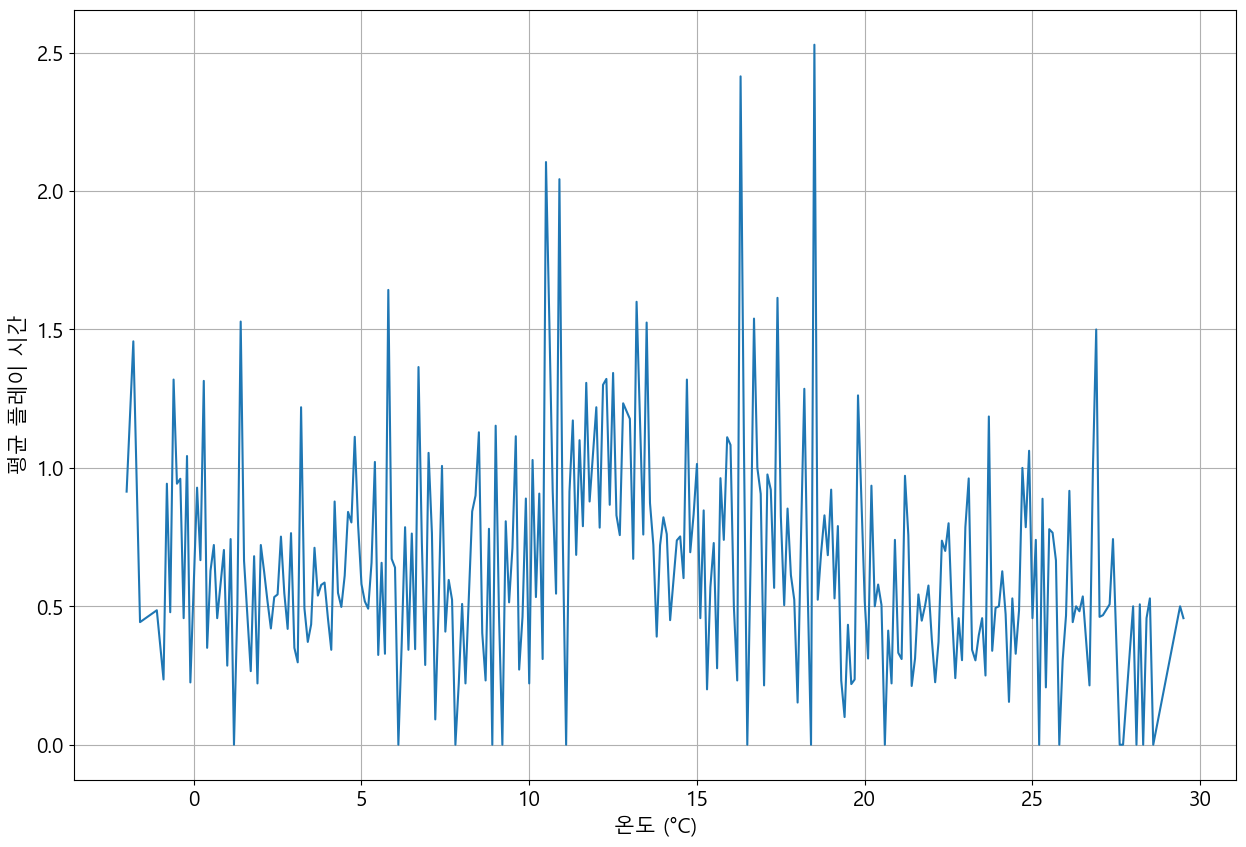

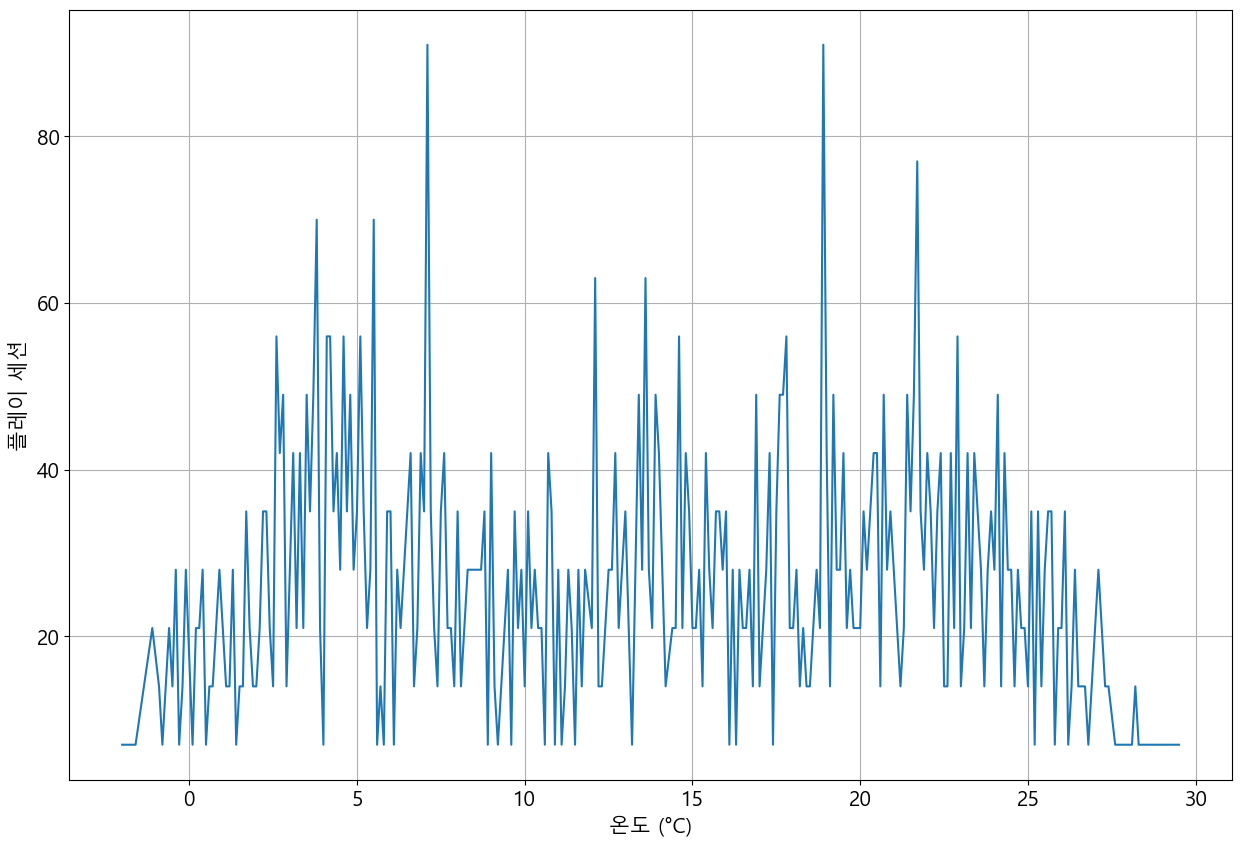

In [6]:
temp_playtime = golf_df.groupby('Temperature')['PlayTimeHour'].mean().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=temp_playtime, x='Temperature', y='PlayTimeHour')
plt.xlabel('온도 (°C)')
plt.ylabel('평균 플레이 시간')
plt.grid(True)
plt.show()

temp_sessions = golf_df.groupby('Temperature')['Play'].count().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=temp_sessions, x='Temperature', y='Play')
plt.xlabel('온도 (°C)')
plt.ylabel('플레이 세션')
plt.grid(True)
plt.show()

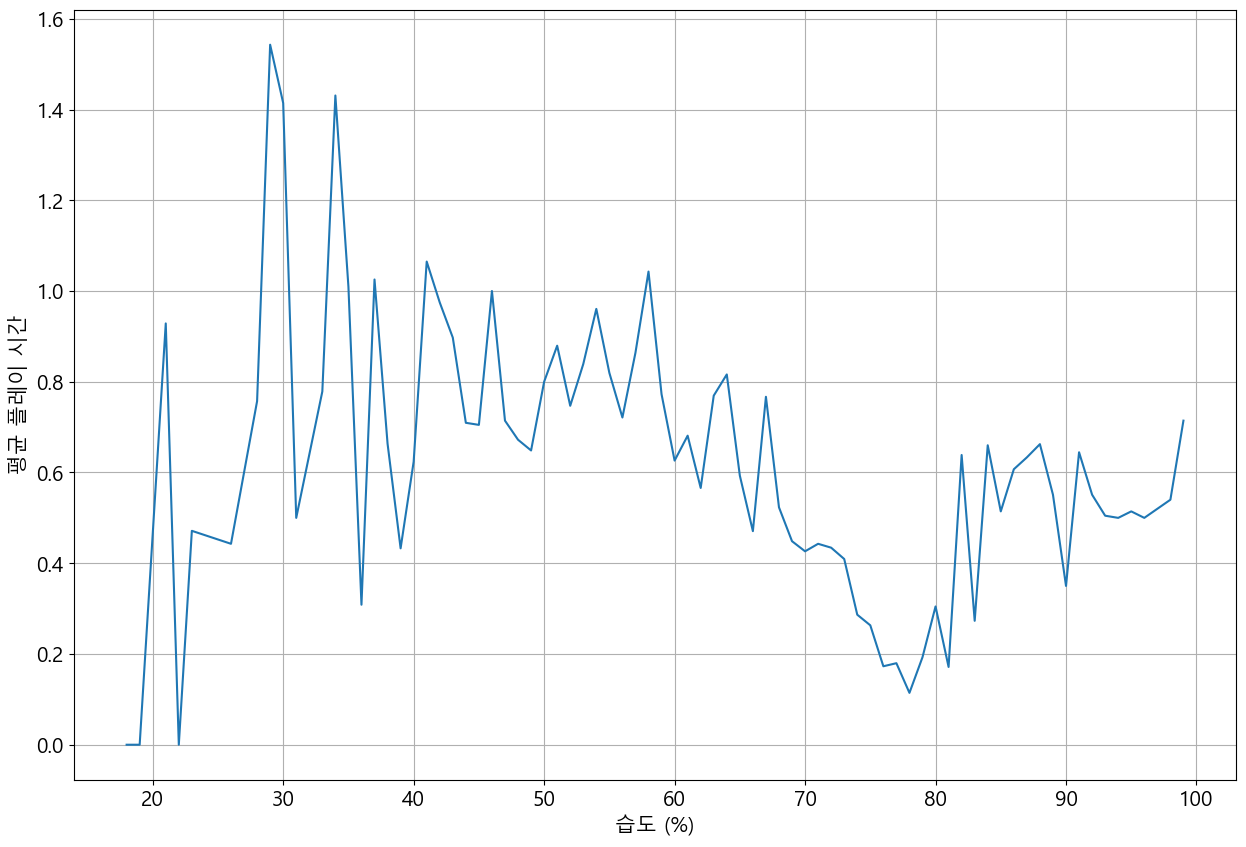

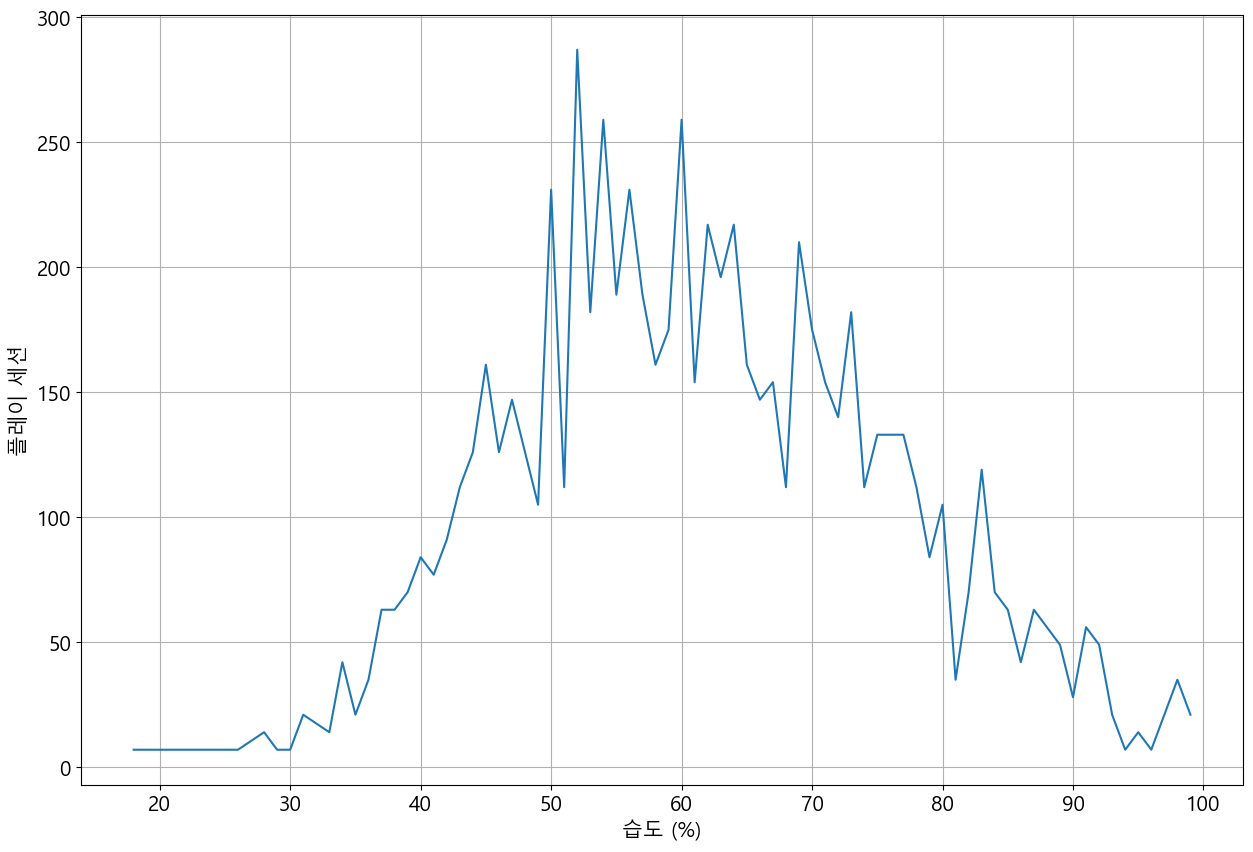

In [7]:
humidity_playtime = golf_df.groupby('Humidity')['PlayTimeHour'].mean().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=humidity_playtime, x='Humidity', y='PlayTimeHour')
plt.xlabel('습도 (%)')
plt.ylabel('평균 플레이 시간')
plt.grid(True)
plt.show()

humidity_sessions = golf_df.groupby('Humidity')['Play'].count().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=humidity_sessions, x='Humidity', y='Play')
plt.xlabel('습도 (%)')
plt.ylabel('플레이 세션')
plt.grid(True)
plt.show()

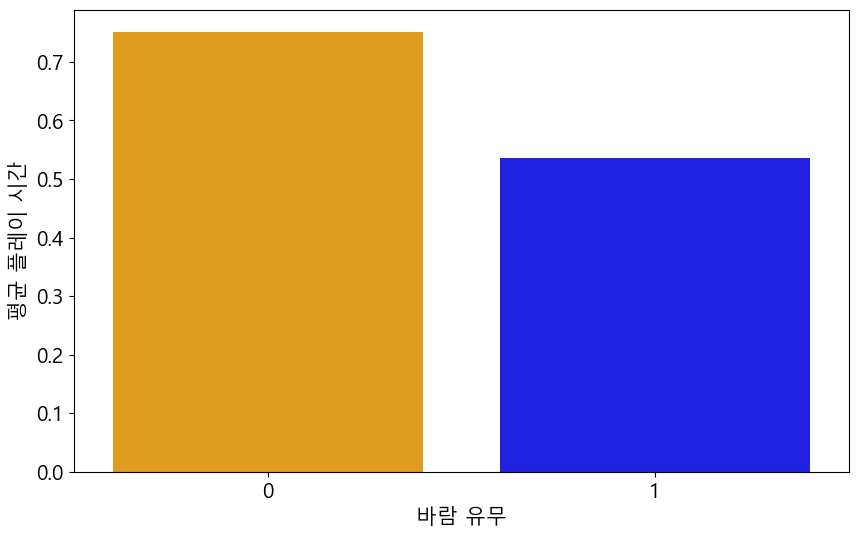

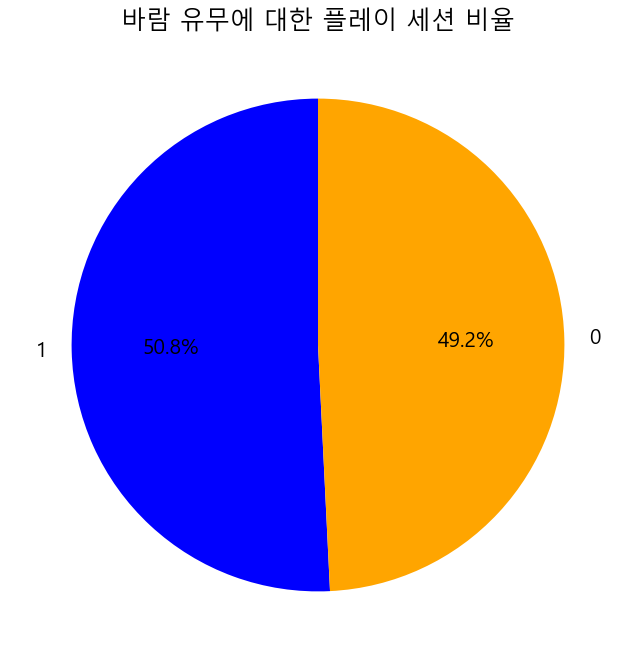

In [8]:
windy_playtime = golf_df.groupby('Windy')['PlayTimeHour'].mean().reset_index()
windy_sessions = golf_df['Windy'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(data=windy_playtime, x='Windy', y='PlayTimeHour', palette={0: 'orange', 1: 'blue'})
plt.xlabel('바람 유무')
plt.ylabel('평균 플레이 시간')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(windy_sessions, labels=windy_sessions.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('바람 유무에 대한 플레이 세션 비율')
plt.show()

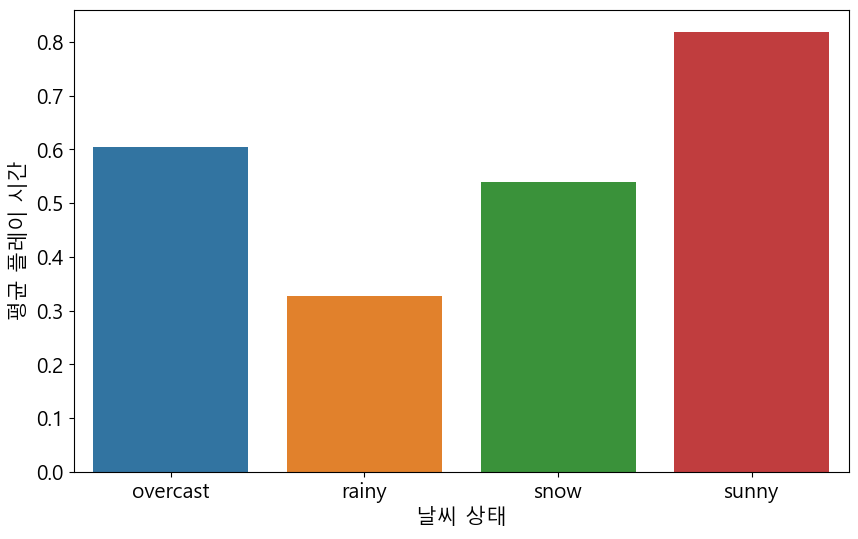

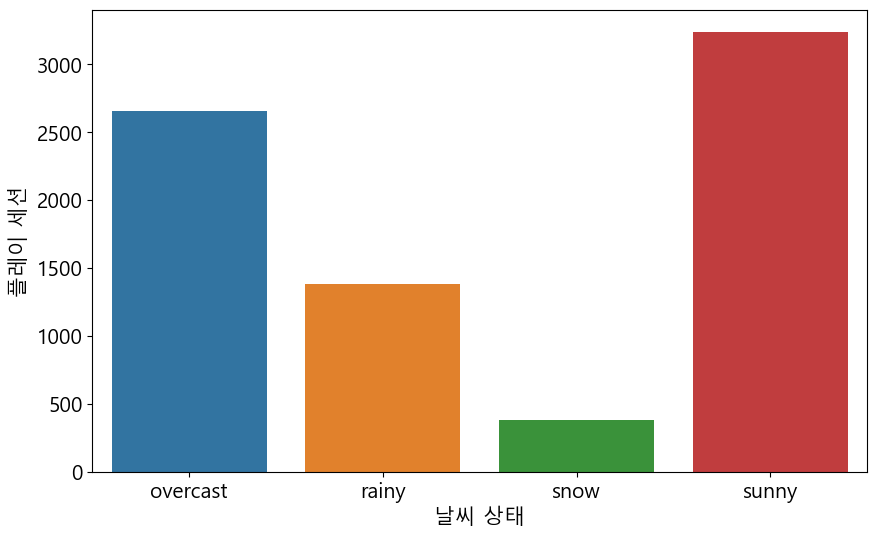

In [9]:
outlook_playtime = golf_df.groupby('Outlook')['PlayTimeHour'].mean().reset_index()
outlook_sessions = golf_df.groupby('Outlook')['Play'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=outlook_playtime, x='Outlook', y='PlayTimeHour')
plt.xlabel('날씨 상태')
plt.ylabel('평균 플레이 시간')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=outlook_sessions, x='Outlook', y='Play')
plt.xlabel('날씨 상태')
plt.ylabel('플레이 세션')
plt.show()


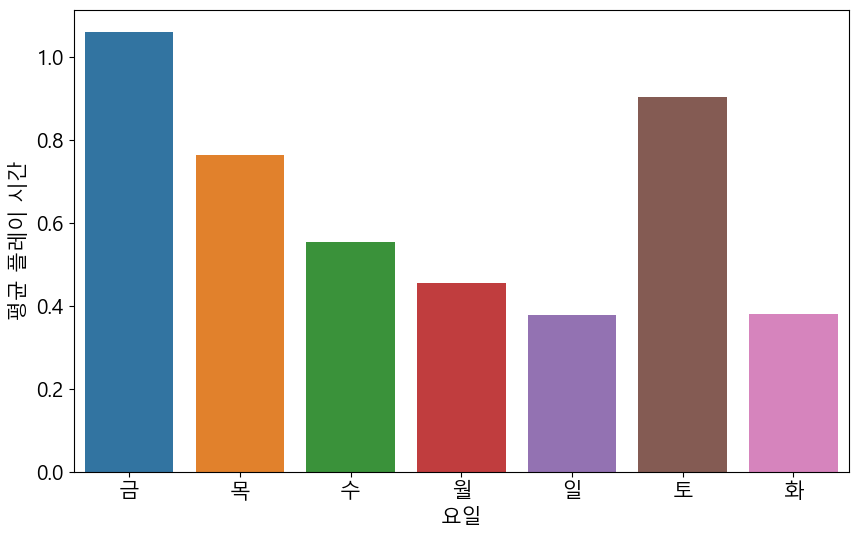

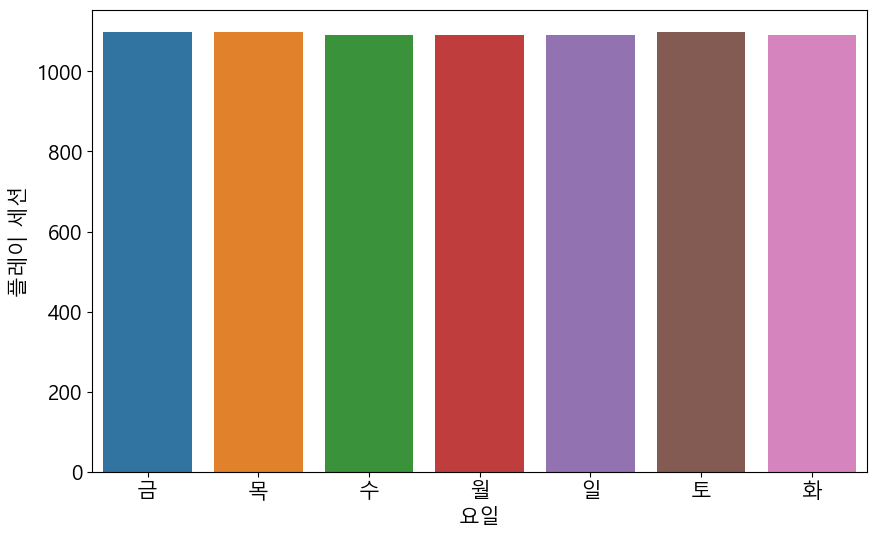

In [10]:
weekday_playtime = golf_df.groupby('Weekday_Num')['PlayTimeHour'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_playtime, x='Weekday_Num', y='PlayTimeHour')
plt.xlabel('요일')
plt.ylabel('평균 플레이 시간')
plt.show()

weekday_sessions = golf_df.groupby('Weekday_Num')['Play'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sessions, x='Weekday_Num', y='Play')
plt.xlabel('요일')
plt.ylabel('플레이 세션')
plt.show()

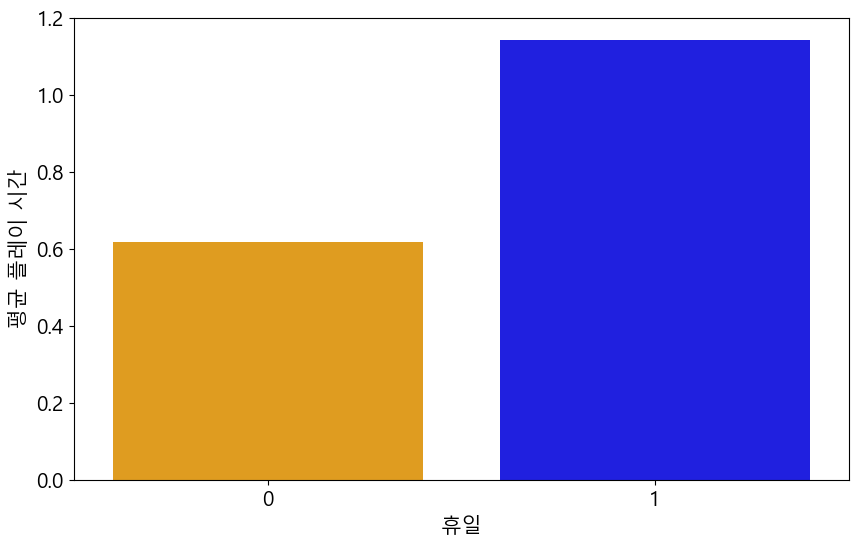

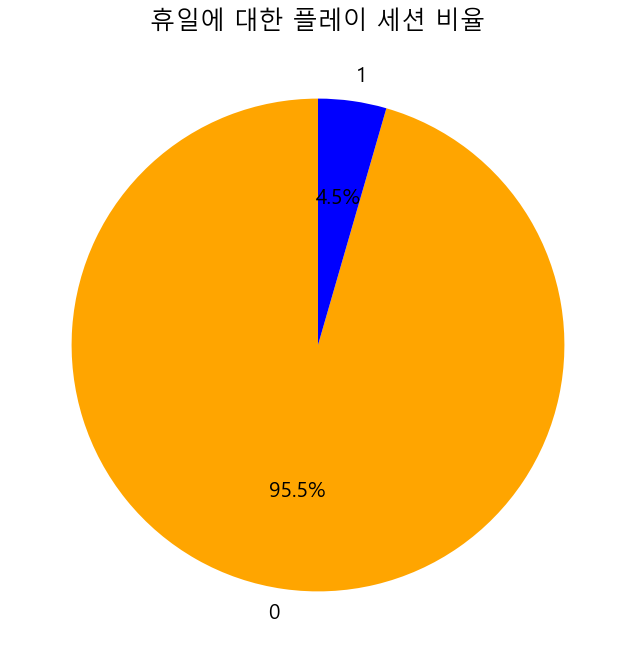

In [11]:
Holiday_playtime = golf_df.groupby('Holiday')['PlayTimeHour'].mean().reset_index()
Holiday_sessions = golf_df['Holiday'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(data=Holiday_playtime, x='Holiday', y='PlayTimeHour', palette={0: 'orange', 1: 'blue'})
plt.xlabel('휴일')
plt.ylabel('평균 플레이 시간')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(Holiday_sessions, labels=Holiday_sessions.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('휴일에 대한 플레이 세션 비율')
plt.show()

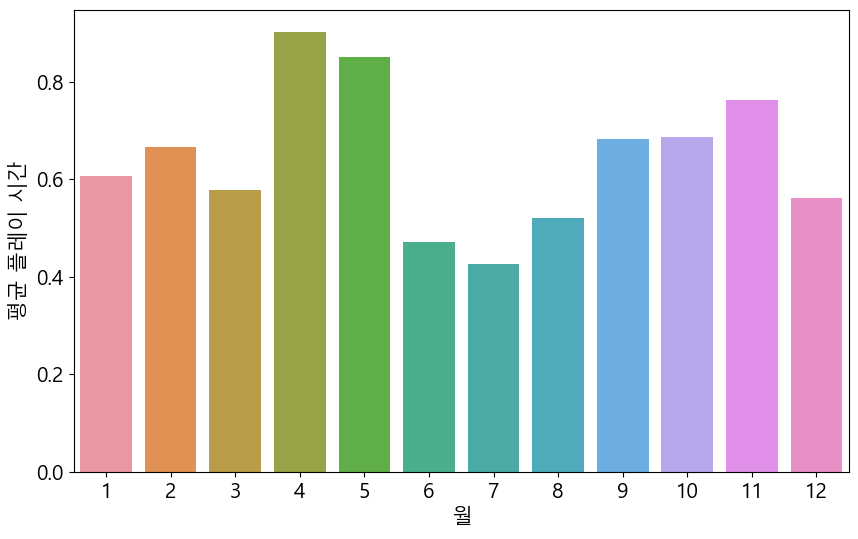

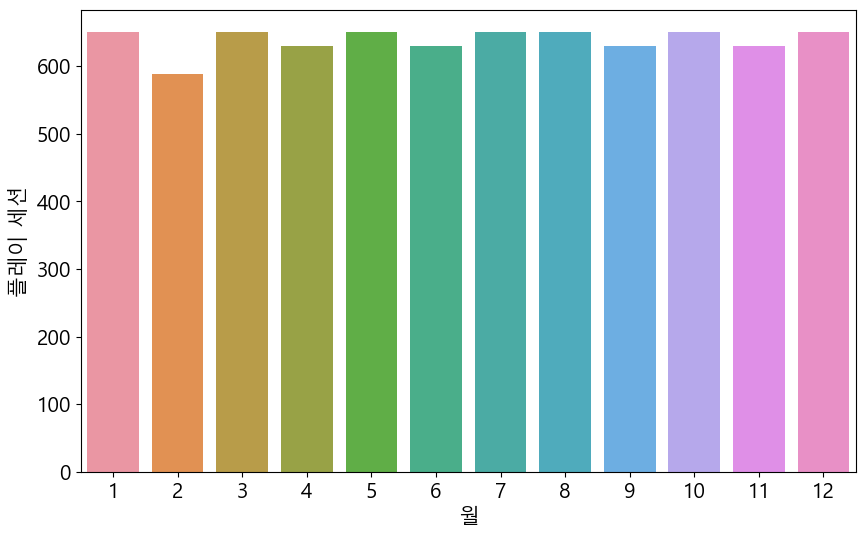

In [12]:
Month_playtime = golf_df.groupby('Month_Num')['PlayTimeHour'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=Month_playtime, x='Month_Num', y='PlayTimeHour')
plt.xlabel('월')
plt.ylabel('평균 플레이 시간')
plt.show()

Month_sessions = golf_df.groupby('Month_Num')['Play'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=Month_sessions, x='Month_Num', y='Play')
plt.xlabel('월')
plt.ylabel('플레이 세션')
plt.show()

In [13]:
golf_df.head(1)

,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review,Weekday_Num,Month_Num
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...,목,1


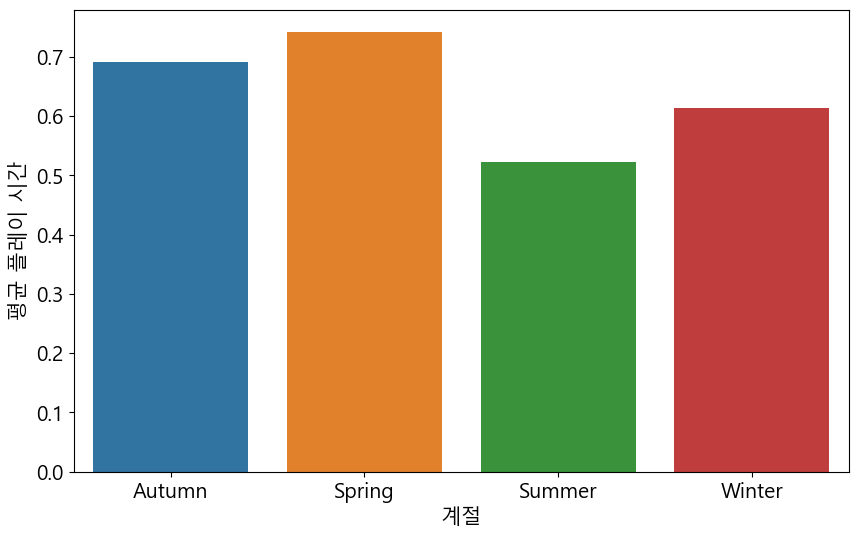

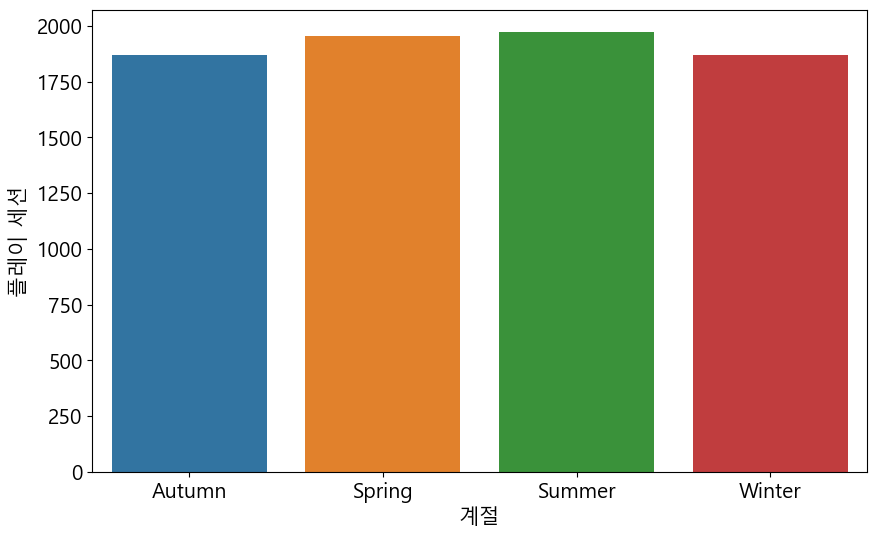

In [14]:
Month_playtime = golf_df.groupby('Season')['PlayTimeHour'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=Month_playtime, x='Season', y='PlayTimeHour')
plt.xlabel('계절')
plt.ylabel('평균 플레이 시간')
plt.show()

Month_sessions = golf_df.groupby('Season')['Play'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=Month_sessions, x='Season', y='Play')
plt.xlabel('계절')
plt.ylabel('플레이 세션')
plt.show()

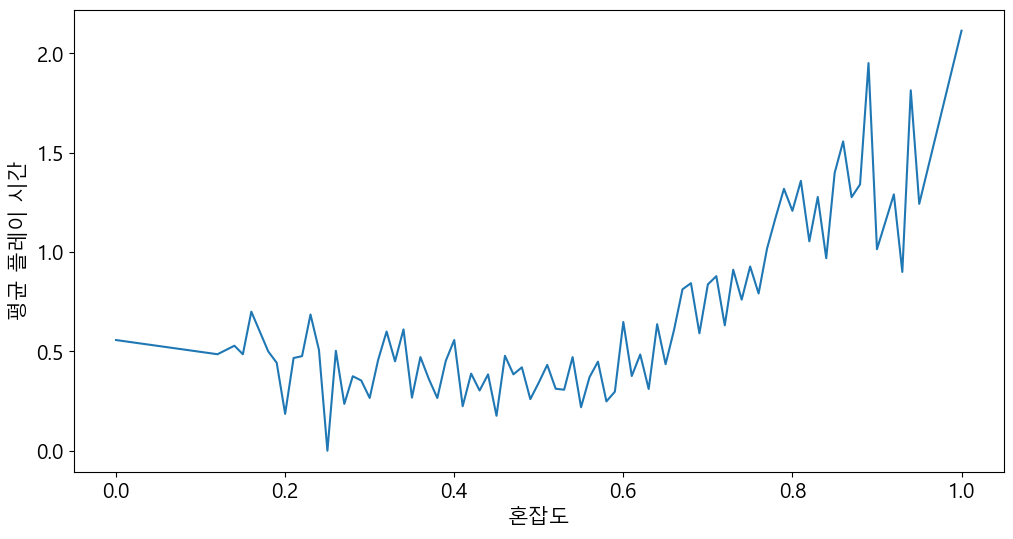

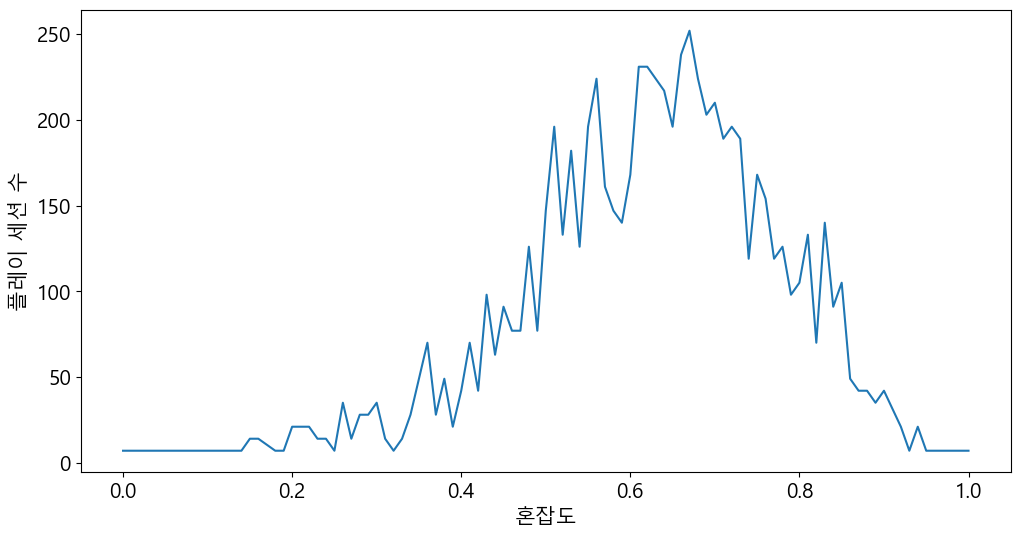

In [15]:
crowdedness_playtime = golf_df.groupby('Crowdedness')['PlayTimeHour'].mean().reset_index()
crowdedness_sessions = golf_df.groupby('Crowdedness')['Play'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=crowdedness_playtime, x='Crowdedness', y='PlayTimeHour')
plt.xlabel('혼잡도')
plt.ylabel('평균 플레이 시간')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=crowdedness_sessions, x='Crowdedness', y='Play')
plt.xlabel('혼잡도')
plt.ylabel('플레이 세션 수')
plt.show()

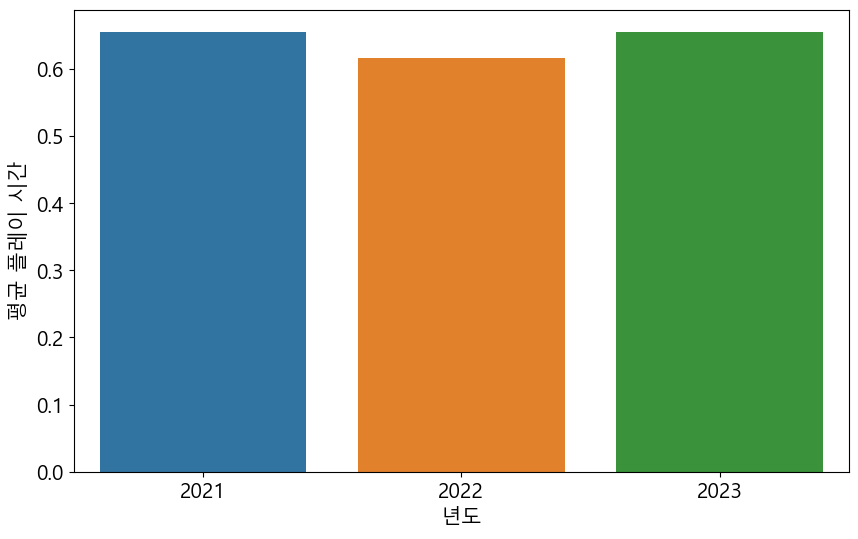

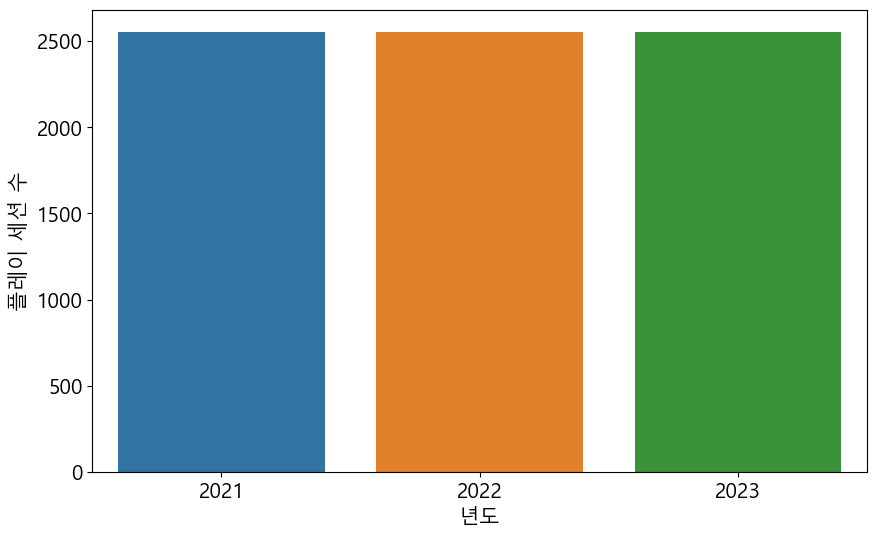

In [16]:
golf_df['Year'] = pd.to_datetime(golf_df['Date']).dt.year

yearly_playtime = golf_df.groupby('Year')['PlayTimeHour'].mean().reset_index()
yearly_sessions = golf_df.groupby('Year')['Play'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_playtime, x='Year', y='PlayTimeHour')
plt.xlabel('년도')
plt.ylabel('평균 플레이 시간')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sessions, x='Year', y='Play')
plt.xlabel('년도')
plt.ylabel('플레이 세션 수')
plt.show()

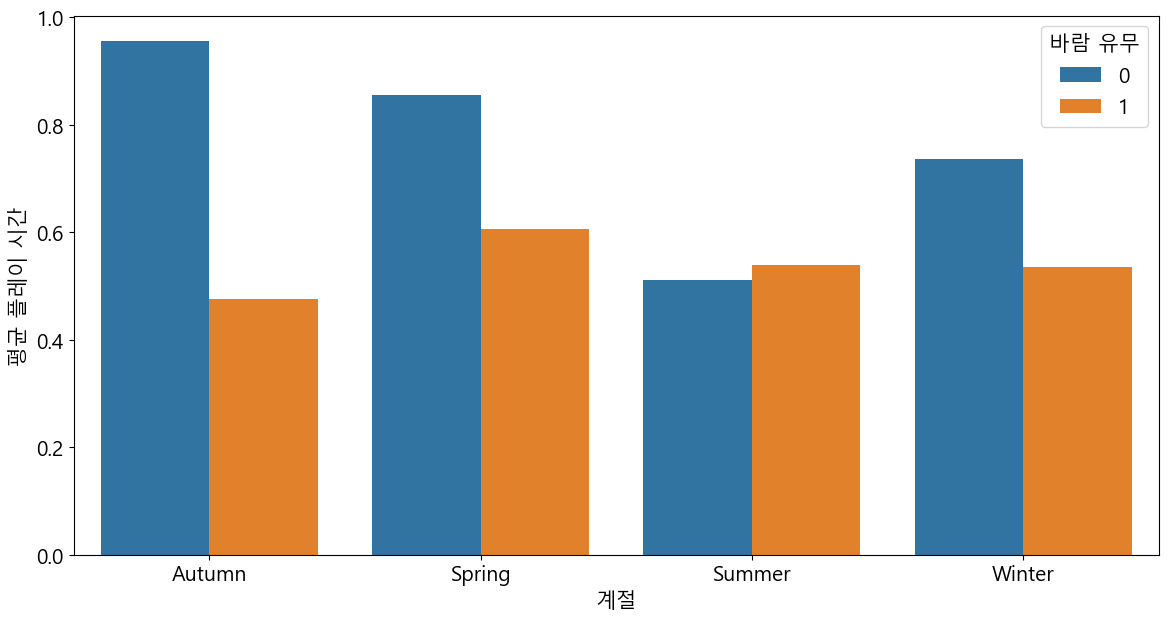

In [17]:
season_windy_sessions = golf_df.groupby(['Season', 'Windy'])['Play'].count().reset_index
season_windy_playtime = golf_df.groupby(['Season', 'Windy'])['PlayTimeHour'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=season_windy_playtime, x='Season', y='PlayTimeHour', hue='Windy')
plt.xlabel('계절')
plt.ylabel('평균 플레이 시간')
plt.legend(title='바람 유무')
plt.show()

In [18]:
season_to_number = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
golf_df['Season_Num'] = golf_df['Season'].map(season_to_number)

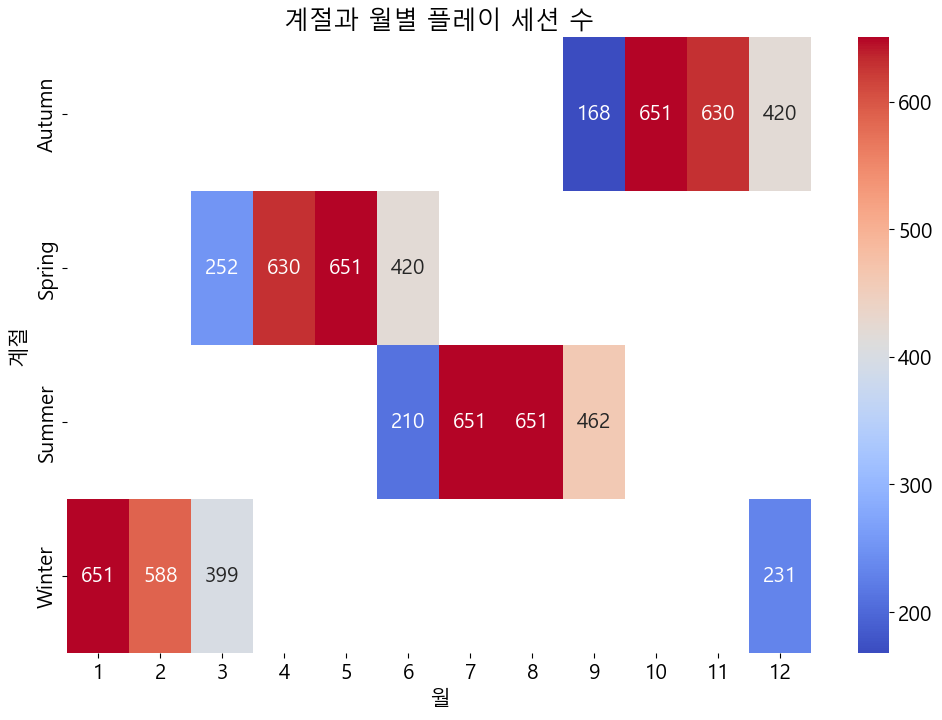

In [19]:
month_season_sessions = golf_df.groupby(['Season', 'Month_Num'])['Play'].count().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(month_season_sessions, annot=True, fmt="g", cmap='coolwarm')
plt.title('계절과 월별 플레이 세션 수')
plt.xlabel('월')
plt.ylabel('계절')
plt.show()

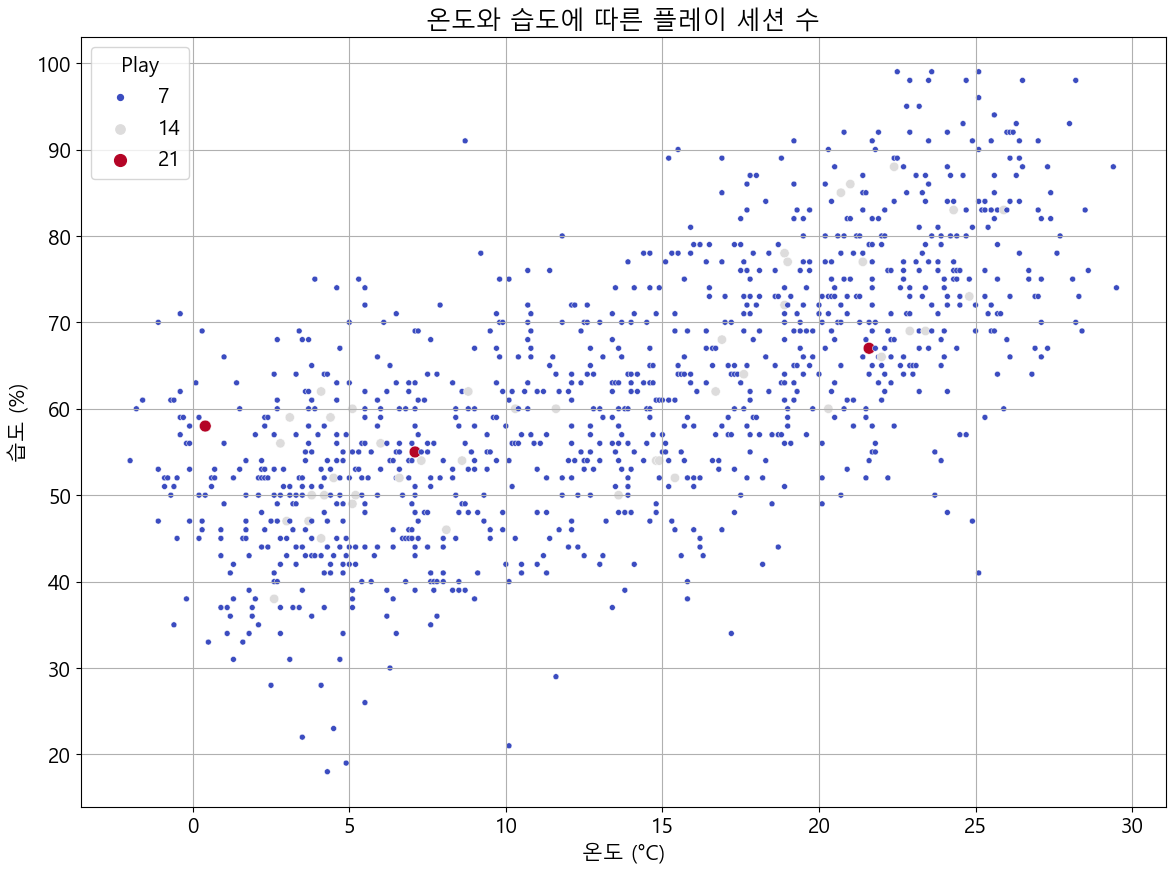

In [20]:
temp_humidity_sessions = golf_df.groupby(['Temperature', 'Humidity'])['Play'].count().reset_index()

plt.figure(figsize=(14, 10))
sns.scatterplot(data=temp_humidity_sessions, x='Temperature', y='Humidity', size='Play', 
                hue='Play', palette='coolwarm', legend=True)
plt.title('온도와 습도에 따른 플레이 세션 수')
plt.xlabel('온도 (°C)')
plt.ylabel('습도 (%)')
plt.grid(True)
plt.show()